<a class="anchor" id="0"></a>
# **Logistic Regression Classifier Tutorial with Python**

# 로지스틱 회귀 분류기 __ 김정연

<a class="anchor" id="0.1"></a>
# **목차**


1.	[로지스틱 회귀 소개](#1)
2.	[로지스틱 회귀 직관](#2)
3.	[로지스틱 회귀 분석의 가정](#3)
4.	[로지스틱 회귀 분석 유형](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[데이터 분석 탐색하기](#7)
8.	[feature vector, 목표 변수 선언하기](#8)
9.	[training, test set 으로 분리하기](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[모델 학습](#12)
13.	[예측결과](#13)
14.	[정확도 점수 확인하기](#14)
15.	[혼동 행렬Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[임계값 레벨 조정](#17)
18.	[ROC - AUC](#18)
19.	[k-Fold Cross Validation](#19)
20.	[Hyperparameter optimization using GridSearch CV](#20)
21.	[결과와 결론](#21)
22. [참조](#22)


# **1. 로지스틱 회귀 분석의 가정** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


로지스틱 회귀분석은 주어진 독립 변수의 선형 조합을 이용하여 종속 변수를 예측하는 통계 기법 중 하나입니다. 주로 **이진 분류(binary classification)** 문제에 사용되며, 예측값이 이산적인(discrete) 형태를 가집니다.

로지스틱 회귀분석에서는 로지스틱 함수를 이용하여 종속 변수의 값을 0과 1사이로 제한합니다. 로지스틱 함수를 이용하여 예측된 값이 0.5보다 크면 1로 분류하고, 그렇지 않으면 0으로 분류합니다.

로지스틱 회귀분석은 선형 회귀분석과 달리, 독립 변수와 종속 변수 사이의 관계가 선형이 아닐 수도 있습니다. 이를 위해 로지스틱 함수를 사용하여 비선형적인 형태의 관계를 모델링할 수 있습니다.


# **2. 로지스틱 회귀 분석 유형** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


통계학에서 **로지스틱 회귀 모델(Logistic Regression model)**은 주로 분류 목적으로 사용되는 널리 사용되는 통계 모델입니다. 즉, 일련의 관측치가 주어졌을 때, 로지스틱 회귀 알고리즘은 이러한 관측치를 두 개 이상의 이산적인 클래스로 분류하는 데 도움이 됩니다. 따라서 대상 변수는 이산적인 형태를 가집니다.

로지스틱 회귀 알고리즘은 다음과 같이 작동합니다.

## **선형방정식 구현하기**



로지스틱 회귀 분석 알고리즘은 반응 값을 예측하기 위해 독립 변수 또는 설명 변수가 있는 선형 방정식을 구현하는 방식으로 작동합니다. 예를 들어, 우리는 공부한 시간의 수와 시험에 합격할 확률의 예를 고려합니다. 여기서 연구된 시간 수는 설명 변수이며 x1로 표시됩니다. 합격 확률은 반응 변수 또는 목표 변수이며 z로 표시됩니다.


만약 우리가 하나의 설명 변수(x1)와 하나의 반응 변수(z)를 가지고 있다면, 선형 방정식은 다음과 같은 방정식으로 수학적으로 주어질 것입니다

$$z = β0 + β1x1$$

여기서 계수 β0과 β1은 모형의 모수입니다.


설명 변수가 여러 개인 경우, 위의 방정식은 다음과 같이 확장될 수 있습니다

$$z = β0 + β1x1 + β2x2+….+ βnxn$$

여기서 계수 β0, β1, β2 및 βn은 모델의 매개변수입니다.

따라서 예측 반응 값은 위의 방정식에 의해 주어지며 z로 표시됩니다.

## **시그모이드 함수**


예측된 응답 값을 z로 표기하고, 이 값은 0과 1 사이의 확률 값으로 변환됩니다. 우리는 예측된 값을 확률 값으로 매핑하기 위해 시그모이드 함수를 사용합니다. 시그모이드 함수는 임의의 실수 값을 0과 1 사이의 확률 값으로 매핑합니다.

기계 학습에서 시그모이드 함수는 예측 값을 확률 값으로 매핑하는 데 사용됩니다. 시그모이드 함수는 S 모양의 곡선을 가지며, sigmoid curve라고도합니다.

시그모이드 함수는 로지스틱 함수의 특수한 경우입니다. 다음 수학 공식으로 표현됩니다.

그래프로는 시그모이드 함수를 다음과 같은 그래프로 나타낼 수 있습니다.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **의사결정 단**

시그모이드 함수는 0과 1 사이의 확률 값을 반환합니다. 이 확률 값은 "0" 또는 "1"인 이산적인 클래스에 매핑됩니다. 이 확률 값을 이산적인 클래스(합격/불합격, 예/아니오, 참/거짓)에 매핑하기 위해 우리는 임계값을 선택합니다. 이 임계값을 의사결정 경계(Decision boundary)라고 합니다. 이 임계값 이상에서는 확률 값을 클래스 1로 매핑하고, 이하에서는 클래스 0으로 매핑합니다.

수학적으로는 다음과 같이 표현할 수 있습니다:

$$p ≥ 0.5 => 클래스 = 1$$

$$p < 0.5 => 클래스 = 0$$

일반적으로, 의사결정 경계는 0.5로 설정됩니다. 따라서, 확률 값이 0.8(>0.5)인 경우, 이 관측치를 클래스 1로 매핑합니다. 마찬가지로, 확률 값이 0.2(<0.5)인 경우, 이 관측치를 클래스 0으로 매핑합니다. 이는 아래 그래프에서 표시됩니다.

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **예측하기**

이제 로지스틱 회귀에서의 시그모이드 함수와 의사결정 경계(Decision boundary)에 대해 알게 되었습니다. 시그모이드 함수와 의사결정 경계(Decision boundary)에 대한 지식을 활용하여 예측 함수를 작성할 수 있습니다. 로지스틱 회귀에서의 예측 함수는 관측치가 양성(Positive), Yes 또는 True인 확률을 반환합니다. 우리는 이를 클래스 1로 부르고 P(class = 1)로 표기합니다. 확률이 1에 가까워질수록 관측치가 클래스 1에 속할 확률이 높아지며, 그렇지 않으면 클래스 0에 속한다고 판단합니다.

# **3. 로지스틱 회귀 분석의 가정** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)

로지스틱 회귀 모델은 여러 가지 핵심 가정을 필요로 합니다. 이러한 가정은 다음과 같습니다:

1. 로지스틱 회귀 모델은 종속 변수가 이항, 다항 또는 서열형이어야 합니다.

2. 관측치는 서로 독립적이어야 합니다. 따라서, 관측치는 반복 측정에서 나오면 안 됩니다.

3. 로지스틱 회귀 알고리즘은 독립 변수들 사이에 다중공선성(multicollinearity)이 적거나 없어야 합니다. 즉, 독립 변수들은 서로 높은 상관 관계를 가지면 안 됩니다.

4. 로지스틱 회귀 모델은 독립 변수와 로그 오즈(log odds)의 선형성을 가정합니다.

5. 로지스틱 회귀 모델의 성공은 표본 크기에 따라 달라집니다. 일반적으로, 높은 정확도를 얻기 위해서는 큰 표본 크기가 필요합니다.





# **4. 로지스틱 회귀 분석 유형** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


로지스틱 회귀 모델은 목표 변수 카테고리에 따라 세 가지 그룹으로 분류될 수 있습니다. 이 세 가지 그룹은 다음과 같이 설명됩니다:-

### 1. 이항 로지스틱 회귀
이항 로지스틱 회귀에서는 목표 변수가 두 개의 가능한 카테고리를 가지고 있습니다. 대표적인 예는 예/아니오, 좋음/나쁨, 참/거짓, 스팸/스팸 아님, 합격/불합격 등이 있습니다.

### 2. 다항 로지스틱 회귀
다항 로지스틱 회귀에서는 목표 변수가 순서 없이 세 개 이상의 카테고리를 가지고 있습니다. 따라서 세 개 이상의 명목적인 카테고리가 있습니다. 예를 들어, 과일 종류의 카테고리는 사과, 망고, 오렌지 및 바나나 등이 있습니다.

### 3. 순서형 로지스틱 회귀
순서형 로지스틱 회귀에서는 목표 변수가 순서가 있는 세 개 이상의 카테고리를 가지고 있습니다. 따라서 카테고리 사이에 내재된 순서가 있습니다. 예를 들어, 학생 성적은 나쁨, 평균, 좋음, 우수한 등으로 분류될 수 있습니다.


# **5. Import libraries** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)

In [3]:
data = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'

df = pd.read_csv(data)

# **7. 데이터 분석 탐색하기** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)




In [4]:
# view dimensions of dataset

df.shape

(145460, 23)

데이터셋에는 142193개의 인스턴스와 24개의 변수가 있다는 것을 확인할 수 있습니다.

In [5]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

### 변수 유형
이번 섹션에서는 데이터셋을 범주형 변수와 수치형 변수로 분류합니다. 데이터셋에는 범주형 변수와 수치형 변수가 혼합되어 있습니다. 범주형 변수는 object 데이터 타입을 가지고 있고, 수치형 변수는 float64 데이터 타입을 가지고 있습니다.

먼저, 범주형 변수를 찾아보겠습니다.

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('범주형 변수 개수 {}\n'.format(len(categorical)))

print('범주형 변수들은 다음과 같다 :', categorical)

범주형 변수 개수 7

범주형 변수들은 다음과 같다 : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### 범주형 변수 요약
`Date` 변수가 있습니다.

총 6개의 범주형 변수가 있습니다. 이는 `Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow` 입니다.

이 중 `RainToday`와 `RainTomorrow` 변수는 이진 범주형 변수입니다.

`RainTomorrow` 변수는 타겟 변수입니다.

## 범주형 변수 내 문제 탐구
첫째로, 범주형 변수를 살펴보겠습니다.

### 범주형 변수 내 결측치

In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [11]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


데이터 세트에는 결측값이 있는 범주형 변수가 4개만 있습니다. 이것들은 `WindGustDir, WindDir9am, WindDir3pm, RainToday`입니다.

### 범주형 변수의 빈도수 카운트
이제 범주형 변수의 빈도수 카운트를 확인해보겠습니다.

In [12]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-08-28    49
2016-01-08    49
2016-11-15    49
2017-04-02    49
2014-10-23    49
              ..
2007-11-02     1
2007-11-12     1
2007-12-16     1
2008-01-25     1
2007-11-05     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Hobart              3193
Darwin              3193
Brisbane            3193
Perth               3193
Adelaide            3193
Melbourne           3193
Albany              3040
MountGinini         3040
Townsville          3040
MountGambier        3040
GoldCoast           3040
Launceston          3040
AliceSprings        3040
Ballarat            3040
Albury              3040
Wollongong          3040
Cairns              3040
Bendigo             3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Nuriootpa           3009
Portland            3009
Moree               3009
Mildura             3009
NorfolkIsland       3009
Richmond            3009
MelbourneAirport    3009
Woomera             3009

In [13]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

2013-08-28    0.000337
2016-01-08    0.000337
2016-11-15    0.000337
2017-04-02    0.000337
2014-10-23    0.000337
                ...   
2007-11-02    0.000007
2007-11-12    0.000007
2007-12-16    0.000007
2008-01-25    0.000007
2007-11-05    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Hobart              0.021951
Darwin              0.021951
Brisbane            0.021951
Perth               0.021951
Adelaide            0.021951
Melbourne           0.021951
Albany              0.020899
MountGinini         0.020899
Townsville          0.020899
MountGambier        0.020899
GoldCoast           0.020899
Launceston          0.020899
AliceSprings        0.020899
Ballarat            0.020899
Albury              0.020899
Wollongong          0.020899
Cairns              0.020899
Bendigo             0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Nuriootpa           0.020686
Portland  

### 레이블 수: 카디널리티
카테고리 변수 내의 레이블 수를 카디널리티라고 합니다. 변수 내의 레이블 수가 많을 경우 **고 카디널리티(high cardinality)**로 알려져 있습니다. 고 카디널리티는 머신 러닝 모델에서 심각한 문제를 일으킬 수 있습니다. 따라서 고 카디널리티를 확인하겠습니다.

In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


날짜 변수 Date가 전처리되어야 하는 것으로 나타납니다. 다음 섹션에서 전처리를 수행하겠습니다.

다른 모든 변수는 상대적으로 적은 수의 변수를 포함합니다.

### Feature Engineering of Date Variable

In [15]:
df['Date'].dtypes

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

In [16]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [18]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [19]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [20]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
Date             145460 non-null datetime64[ns]
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-n

We can see that there are three additional columns created from `Date` variable. Now, I will drop the original `Date` variable from the dataset.

In [21]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [22]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Now, we can see that the `Date` variable has been removed from the dataset.


### Explore Categorical Variables


Now, I will explore the categorical variables one by one. 

In [23]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [24]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [25]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [26]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3436
Sydney              3344
Hobart              3193
Darwin              3193
Brisbane            3193
Perth               3193
Adelaide            3193
Melbourne           3193
Albany              3040
MountGinini         3040
Townsville          3040
MountGambier        3040
GoldCoast           3040
Launceston          3040
AliceSprings        3040
Ballarat            3040
Albury              3040
Wollongong          3040
Cairns              3040
Bendigo             3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Nuriootpa           3009
Portland            3009
Moree               3009
Mildura             3009
NorfolkIsland       3009
Richmond            3009
MelbourneAirport    3009
Woomera             3009
Cobar               3009
Watsonia            3009
WaggaWagga          3009
PerthAirport        3009
BadgerysCreek       3009
SydneyAirport       3009
PearceRAAF          3009
CoffsHarbour        3009
Witchcliffe         3009


In [28]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [29]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [30]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [31]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [32]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

### Explore `WindDir9am` variable

In [34]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [35]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [36]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [37]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

We can see that there are 10013 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [39]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [40]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [41]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [42]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [44]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [45]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [47]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [49]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [50]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Summary of numerical variables


- There are 16 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## 수치형 변수 내 결측치 탐색
이번에는 수치형 변수들을 탐색해보겠습니다.

수치형 변수 내 결측치
### 먼저, 수치형 변수 내 결측치를 확인해보겠습니다.

In [51]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [52]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

자세히 살펴보면, `Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm` 열에 이상치가 포함될 수 있다는 것을 알 수 있습니다.

위 변수들에서 이상치를 시각화하기 위해 상자 그림을 그릴 것입니다.





Text(0, 0.5, 'WindSpeed3pm')

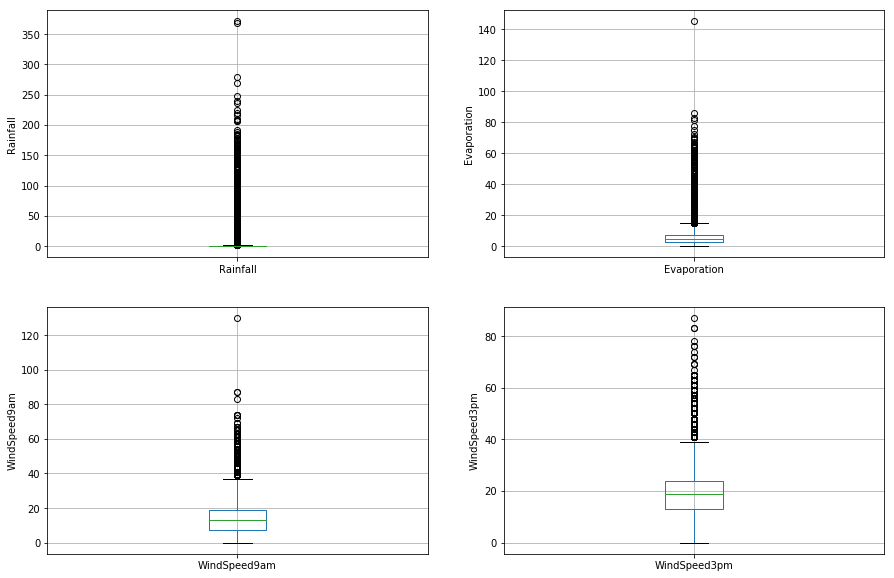

In [53]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

위의 상자그림은 이 변수들에 이상치가 많이 있다는 것을 확인시켜 줍니다.

### 변수의 분포 확인하기
이제 히스토그램을 그려서 분포를 확인하고, 정규분포인지 왜도(skewness)가 있는지 알아보겠습니다. 만약 변수가 정규분포를 따른다면 극값 분석(Extreme Value Analysis)을 수행하겠지만, 왜도가 있다면 IQR(Interquantile range)를 구할 것입니다.

Text(0, 0.5, 'RainTomorrow')

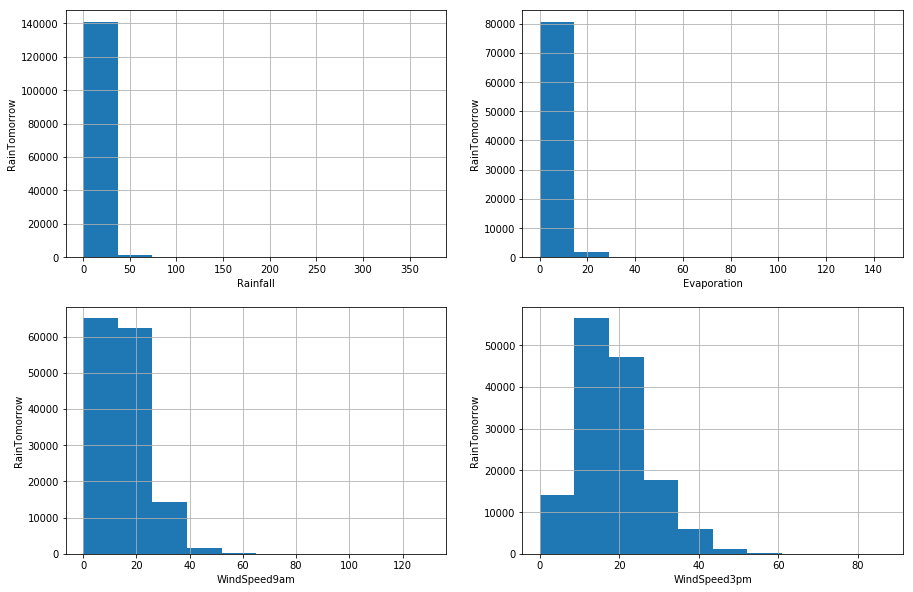

In [54]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

네 개의 변수 모두 왜도가 있는 것으로 보입니다. 그러므로, 외부값(outlier)을 찾기 위해 IQR(Interquantile range)를 사용하겠습니다.

In [55]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


강수량(Rainfall) 변수의 최솟값과 최댓값은 각각 0.0과 371.0입니다. 따라서, 이상치는 3.2보다 큰 값입니다.

In [56]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


증발량(Evaporation) 변수의 최솟값과 최댓값은 각각 0.0과 145.0입니다. 따라서, 이상치는 21.8보다 큰 값입니다.

In [57]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


풍속9am(WindSpeed9am) 변수의 최솟값과 최댓값은 각각 0.0과 130.0입니다. 따라서, 이상치는 55.0보다 큰 값입니다.

In [58]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


풍속3pm(WindSpeed3pm) 변수의 최솟값과 최댓값은 각각 0.0과 87.0입니다. 따라서, 이상치는 57.0보다 큰 값입니다.

# **8. feature vector, 목표 변수 선언하기** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)

In [59]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# **9. training, test set 으로 분리하기** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

In [60]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [61]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 24), (29092, 24))

# **10. Feature Engineering** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


**특성 공학(Feature Engineering)**은 원시 데이터(raw data)를 유용한 특성(feature)으로 변환하여 모델을 더 잘 이해하고 예측력을 높이는 과정입니다. 다음으로, 각각의 범주형 변수와 수치형 변수를 다시 나누어 표시하겠습니다.

In [62]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [63]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [64]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables



In [65]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [66]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

In [67]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [68]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [69]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [70]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [71]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [72]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [73]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [74]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [75]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [76]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [77]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### 수치형 변수에서 이상치(Outlier) 다루기
`강수량(Rainfall), 증발량(Evaporation), 풍속9am(WindSpeed9am), 풍속3pm(WindSpeed3pm)` 열에 이상치가 있음을 확인했습니다. 위 변수들에서 최댓값을 상한선으로 설정하고 이상치를 제거하기 위해 Top-coding 접근법(Top-coding approach)을 사용하겠습니다.

In [78]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [79]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [80]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [81]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [82]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [83]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


이제 `Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm` 열에서 발견되었던 이상치(outliers)들이 잘린 것을 확인할 수 있습니다.

### Encode categorical variables

In [84]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [85]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [86]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [87]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


RainToday 변수에서 두 가지 추가 변수 `RainToday_0` 및 `RainToday_1`이 생성된 것을 확인할 수 있습니다.

이제 X_train 훈련 세트를 만들어 보겠습니다.

In [88]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [89]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


마찬가지로, `X_test` 테스트 세트를 생성하겠습니다.

In [90]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [91]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


이제 모델 구축을 위해 훈련 및 테스트 세트가 준비되었습니다. 그 전에, 모든 feature 변수를 동일한 척도로 매핑해야 합니다. 이를 `feature scaling`이라고 합니다. 다음과 같이 수행하겠습니다.

# **11. Feature Scaling** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)

In [92]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
cols = X_train.columns

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [95]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [96]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [97]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


이제 우리는 로지스틱 회귀 분류기에 입력할 준비가 된 'X_train' 데이터셋이 있습니다. 저는 다음과 같이 수행하겠습니다.

# **12. 모델 학습** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)

`y_train, y_test`의 결측치를 처리해준다.

In [98]:
from sklearn.preprocessing import LabelEncoder

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)
y_test['RainTomorrow'].fillna(y_test['RainTomorrow'].mode()[0], inplace=True)

train_le = LabelEncoder()
test_le = LabelEncoder()

train_le.fit(y_train['RainTomorrow'].astype('str').drop_duplicates())
test_le.fit(y_test['RainTomorrow'].astype('str').drop_duplicates())

y_train['enc'] = train_le.transform(y_train['RainTomorrow'].astype('str'))
y_test['enc'] = train_le.transform(y_test['RainTomorrow'].astype('str'))

y_train.drop(columns=['RainTomorrow'], inplace=True)
y_test.drop(columns=['RainTomorrow'], inplace=True)

학습시킨다.

In [99]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# **13. 예측결과** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)

In [100]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

### predict_proba 메서드는 이 경우에 대상 변수(0과 1)의 확률을 배열 형태로 제공합니다.

여기서 `0은 비가 오지 않을 확률`이고, `1은 비가 올 확률`입니다.

In [101]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.83218012, 0.74547897, 0.79864899, ..., 0.42025828, 0.65746991,
       0.96954653])

In [102]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.16781988, 0.25452103, 0.20135101, ..., 0.57974172, 0.34253009,
       0.03045347])

# **14. 정확도 점수 확인하기** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)

In [103]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8484


여기서 y_test는 테스트 세트에서의 실제 클래스 레이블이고, y_pred_test는 예측된 클래스 레이블입니다.

### 학습세트와 테스트 세트비교
이제, 과적합(overfitting)을 확인하기 위해 학습 세트(train-set)와 테스트 세트(test-set) 정확도를 비교해보겠습니다.

In [104]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8488


### Check for overfitting and underfitting

In [106]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8488
Test set score: 0.8484


두 점수차이가 거의 나지 않고 비슷한 것을 보아 과적합문제는 없다.


로지스틱 회귀에서는 C의 기본값인 1을 사용합니다. 이 값은 학습 세트와 테스트 세트 모두 약 85%의 정확도로 좋은 성능을 제공합니다. 그러나 학습 세트와 테스트 세트 모두 모델 성능이 매우 비슷하기 때문에 과소적합(underfitting)의 가능성이 있습니다.

따라서, C를 증가시켜 더 유연한 모델을 만들어보겠습니다.

In [107]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8489
Test set score: 0.8491


위의 결과에서 볼 수 있듯이, C=100인 경우 테스트 세트의 정확도가 더 높게 나타났으며, 약간의 증가한 학습 세트 정확도도 확인할 수 있습니다. 따라서, 더 복잡한 모델이 더 나은 성능을 발휘할 것으로 결론을 내릴 수 있습니다.

이제, C의 기본값인 1보다 더 규제화(regularized)된 모델을 사용할 때 어떤 일이 일어나는지 알아보기 위해 C=0.01로 설정해보겠습니다.

In [109]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8427
Test set score: 0.8418


따라서, C=0.01로 더 규제화된 모델을 사용하면 기본 매개변수에 비해 학습 세트와 테스트 세트의 정확도가 모두 감소합니다.

### 모델 정확도와 기준정확도(null accuracy) 비교하기

따라서, 모델 정확도는 0.8484입니다. 그러나 위의 정확도에 기반하여 우리 모델이 매우 좋다고 말할 수는 없습니다. 기준 정확도(null accuracy)와 비교해야 합니다. 기준 정확도는 가장 빈번하게 나타나는 클래스를 항상 예측하는 것으로 얻을 수 있는 정확도입니다.

따라서, 먼저 테스트 세트에서의 클래스 분포를 확인해야 합니다.

In [111]:
# check class distribution in test set

y_test_series = y_test.iloc[:, 0]
y_test_series.value_counts()

0    22726
1     6366
Name: enc, dtype: int64

우리는 가장 빈번한 클래스의 발생 빈도가 22726임을 알 수 있습니다. 따라서, 우리는 22726을 전체 발생 횟수로 나누어 null 정확도(null accuracy)를 계산할 수 있습니다

In [112]:
# check null accuracy score

null_accuracy = (22726/(22726+6366))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7812


번역:
우리는 모델 정확도 점수가 0.8484이지만 널(null) 정확도 점수가 0.7812임을 알 수 있습니다. 따라서, 우리는 로지스틱 회귀 모델이 클래스 레이블을 예측하는 데 아주 좋은 성능을 발휘하고 있다고 결론지을 수 있습니다.

이제 위의 분석을 바탕으로 분류 모델의 정확도가 매우 높다는 결론을 내릴 수 있습니다. 우리 모델은 클래스 레이블을 예측하는 데 매우 잘 수행하고 있습니다.

하지만, 이는 값의 분포에 대한 정보를 제공하지 않으며, 분류기가 만드는 오류 유형에 대해서도 알려주지 않습니다.

이 경우 `혼동 행렬(Confusion matrix)`이라는 도구가 우리를 돕게 됩니다.

# **15. 혼동 행렬Confusion matrix** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)


혼동 행렬(Confusion matrix)은 분류 알고리즘의 성능을 요약하는 도구입니다. 혼동 행렬은 분류 모델의 성능과 모델이 만드는 오류 유형에 대한 명확한 그림을 제공합니다. 이는 각 카테고리별로 올바른 예측과 부정확한 예측을 요약하여 표시됩니다.

분류 모델 성능을 평가할 때는 다음 4가지 결과가 가능합니다.

참 긍정(True Positives, TP) : 어떤 관측치가 특정 클래스에 속한다고 예측하고 실제로 그 클래스에 속할 때 참 긍정이라고 합니다.

참 부정(True Negatives, TN) : 어떤 관측치가 특정 클래스에 속하지 않는다고 예측하고 실제로 그 클래스에 속하지 않을 때 참 부정이라고 합니다.

거짓 긍정(False Positives, FP) : 어떤 관측치가 특정 클래스에 속한다고 예측했지만 실제로는 그 클래스에 속하지 않을 때 거짓 긍정이라고 합니다. 이러한 유형의 오류를 1형 오류(Type I error) 라고 합니다.

거짓 부정(False Negatives, FN) : 어떤 관측치가 특정 클래스에 속하지 않는다고 예측했지만 실제로는 그 클래스에 속할 때 거짓 부정이라고 합니다. 이는 매우 심각한 오류로서 2형 오류(Type II error) 라고 합니다.

이 네 가지 결과는 아래와 같은 혼동 행렬에 요약됩니다.

In [113]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21543  1183]
 [ 3227  3139]]

True Positives(TP) =  21543

True Negatives(TN) =  3139

False Positives(FP) =  1183

False Negatives(FN) =  3227


오차 행렬(confusion matrix)은 21543 + 3139 =  24682개의 정확한 예측과 3227 + 1183 = 4410개의 부정확한 예측을 보여줍니다.

이 경우, 다음과 같습니다.

True Positives (실제 양성:1 및 예측 양성:1) - 20892

True Negatives (실제 음성:0 및 예측 음성:0) - 3285

False Positives (실제 음성:0이지만 예측 양성:1) - 1175 (1형 오류)

False Negatives (실제 양성:1이지만 예측 음성:0) - 3087 (2형 오류)

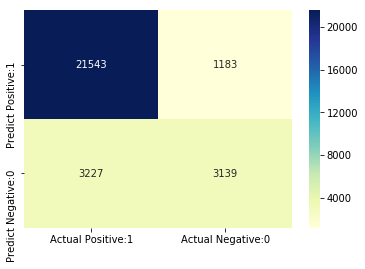

In [114]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification metrices** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)

## Classification Report


**분류 보고서(Classification Report)**는 분류 모델의 성능을 평가하는 다른 방법입니다. 이는 모델의 정밀도(precision), 재현율(recall), f1점수(f1 score) 및 지원(support) 점수를 표시합니다. 이러한 용어는 나중에 설명하겠습니다.

분류 보고서를 출력하는 방법은 다음과 같습니다:-

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.73      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



## Classification accuracy

In [116]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [117]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8484


## Classification error

In [118]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1516


## Precision


**정밀도 (Precision)** 는 예측된 양성 결과 중에서 올바르게 예측된 비율로 정의될 수 있습니다. 이는 참 양성(True Positive, TP)의 수를 참 양성과 거짓 양성(False Positive, FP)의 합(TP + FP)으로 나눈 비율로 표현할 수 있습니다.

따라서 정밀도는 양성 클래스보다는 음성 클래스보다 더 관련된 결과를 식별합니다.

수학적으로는, 정밀도는 `TP / (TP + FP)` 로 정의될 수 있습니다.




In [119]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9479


## Recall


Precision는 모델이 예측한 양성 중에서 올바르게 예측한 비율을 나타내는 지표입니다. 이것은 실제 양성 중에서 모델이 양성으로 예측한 것이 올바른 비율(TP)을 모든 양성 예측(올바른 양성(TP) + 잘못된 양성(FP))으로 나눈 값으로 표시됩니다.

즉, 정밀도는 양성 클래스에 대해서만 음성 클래스보다 더 관심이 있으며, 정확하게 예측된 양성 비율을 식별합니다.

수학적으로, 정밀도는 TP / (TP + FP)로 정의됩니다.

Recall 또는 민감도는 모델이 예측한 양성 결과에서 실제 양성 결과의 비율로 정의될 수 있습니다. 이것은 실제 양성 중에서 모델이 실제로 양성으로 예측한 것(TP)을 실제 양성(TP + FN)으로 나눈 값으로 표시됩니다.

수학적으로, 민감도는 TP / (TP + FN)으로 정의됩니다.





In [120]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8697


## True Positive Rate


**True Positive Rate**는 **재현율**과 같은 말이다

In [121]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8697


## False Positive Rate

In [122]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2737


## Specificity

In [123]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7263


## f1-score


"f1-score"는 정밀도(Precision)와 재현율(Recall)의 가중치 조화 평균(weighted harmonic mean)입니다. 최상의 "f1-score"는 1.0이고, 최악의 경우는 0.0입니다. "f1-score"는 정밀도와 재현율의 조화 평균(harmonic mean)이므로, 정확도 측정값은 정밀도와 재현율을 포함하여 계산되기 때문에 항상 더 높은 값을 가집니다. 분류 모델을 비교할 때는 "f1-score"의 가중 평균(weighted average)을 사용해야 하며, 전체적인 정확도보다는 더 나은 비교 지표가 됩니다.



## Support


"Support"는 데이터셋에서 클래스가 실제로 발생한 횟수(actual number of occurrences)입니다.

# **17. 임계값 레벨 조정** <a class="anchor" id="17"></a>


[Table of Contents](#0.1)

In [124]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.83218012, 0.16781988],
       [0.74547897, 0.25452103],
       [0.79864899, 0.20135101],
       [0.58509213, 0.41490787],
       [0.92165784, 0.07834216],
       [0.95625879, 0.04374121],
       [0.57881888, 0.42118112],
       [0.50293916, 0.49706084],
       [0.80281943, 0.19718057],
       [0.72340946, 0.27659054]])

### Observations


- 각 행마다 숫자의 합은 1이 됩니다.

- 0과 1 두 개의 클래스에 해당하는 2개의 열이 있습니다.

    - 클래스 0 - 내일 비가 오지 않을 확률을 예측한 확률 값

    - 클래스 1 - 내일 비가 올 확률을 예측한 확률 값

- 예측된 확률 값의 중요성

    - 확률 값에 따라 각 관측치를 내일 비가 올 확률이 높은 순으로 순위를 매길 수 있습니다. 
- predict_proba 과정

    - 각 클래스의 확률 값을 예측합니다.

    - 가장 높은 확률 값을 가진 클래스를 선택합니다.

- 분류 임계값

    - 분류 임계값이 0.5로 설정되어 있습니다.

    - 클래스 1은 확률 값이 0.5보다 크면 내일 비가 올 확률로 예측됩니다.

    - 클래스 0은 확률 값이 0.5보다 작으면 내일 비가 오지 않을 확률로 예측됩니다.


In [125]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.832180,0.167820
1,0.745479,0.254521
2,0.798649,0.201351
3,0.585092,0.414908
4,0.921658,0.078342
5,0.956259,0.043741
6,0.578819,0.421181
7,0.502939,0.497061
8,0.802819,0.197181
9,0.723409,0.276591


In [126]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.16781988, 0.25452103, 0.20135101, 0.41490787, 0.07834216,
       0.04374121, 0.42118112, 0.49706084, 0.19718057, 0.27659054])

In [127]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

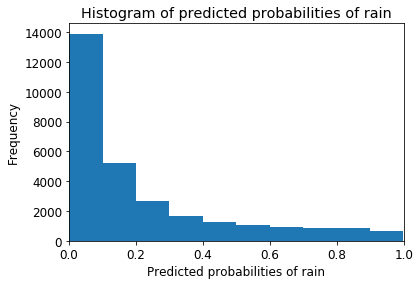

In [128]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### 조사결과

- 위의 히스토그램은 매우 양의 왜도(skewed)를 가진 것으로 보입니다.

- 첫 번째 열은 0.0과 0.1 사이의 확률 값을 가진 약 15000개의 관측치가 있음을 나타냅니다.

- 0.5보다 큰 확률 값을 가진 관측치는 적습니다.

- 따라서 이 적은 수의 관측치는 내일 비가 올 확률로 예측됩니다.

- 대부분의 관측치는 내일 비가 오지 않을 확률로 예측됩니다.

### Lower the threshold

In [129]:
from sklearn.preprocessing import binarize

for i in range(1, 5):
    cm1 = 0
    y_pred1 = logreg.predict_proba(X_test)[:, 1]
    y_pred1 = y_pred1.reshape(-1, 1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    y_test_str = np.where(y_test == 1, 'Yes', 'No') # y_test 레이블을 문자열 형식으로 변환
    
    cm1 = confusion_matrix(y_test_str, y_pred2)
    
    print('With', i/10, 'threshold the Confusion Matrix is\n\n', cm1, '\n\n',
          'with', cm1[0,0]+cm1[1,1], 'correct predictions\n\n',
          cm1[0,1], 'Type I errors (False Positives)\n\n',
          cm1[1,0], 'Type II errors (False Negatives)\n\n',
          'Accuracy score:', accuracy_score(y_test_str, y_pred2), '\n\n',
          'Sensitivity:', cm1[1,1]/float(cm1[1,1]+cm1[1,0]), '\n\n',
          'Specificity:', cm1[0,0]/float(cm1[0,0]+cm1[0,1]), '\n\n',
          '====================================================\n\n')


With 0.1 threshold the Confusion Matrix is

 [[13292  9434]
 [  571  5795]] 

 with 19087 correct predictions

 9434 Type I errors (False Positives)

 571 Type II errors (False Negatives)

 Accuracy score: 0.6560910215866905 

 Sensitivity: 0.9103047439522463 

 Specificity: 0.584880753322186 



With 0.2 threshold the Confusion Matrix is

 [[17741  4985]
 [ 1365  5001]] 

 with 22742 correct predictions

 4985 Type I errors (False Positives)

 1365 Type II errors (False Negatives)

 Accuracy score: 0.7817269352399285 

 Sensitivity: 0.7855796418473139 

 Specificity: 0.7806477162721113 



With 0.3 threshold the Confusion Matrix is

 [[19744  2982]
 [ 2043  4323]] 

 with 24067 correct predictions

 2982 Type I errors (False Positives)

 2043 Type II errors (False Negatives)

 Accuracy score: 0.8272721022961639 

 Sensitivity: 0.679076343072573 

 Specificity: 0.8687846519405087 



With 0.4 threshold the Confusion Matrix is

 [[20840  1886]
 [ 2646  3720]] 

 with 24560 correct predi

### Comments


- 이진(binary) 문제에서는, 예측된 확률 값을 클래스 예측으로 변환하기 위해 기본적으로 0.5의 임계값을 사용합니다.

- 민감도 또는 특이도를 증가시키기 위해 임계값을 조정할 수 있습니다.

- 민감도와 특이도는 역의 관계를 가집니다. 하나를 증가시키면 다른 하나는 항상 감소하게 됩니다.

- 임계값을 높이면 정확도가 증가하는 것을 볼 수 있습니다.

- 임계값을 조정하는 것은 모델 구축 과정에서 마지막 단계 중 하나여야 합니다.

# **18. ROC - AUC** <a class="anchor" id="18"></a>


[Table of Contents](#0.1)



## ROC 곡선
분류 모델 성능을 시각적으로 측정하는 또 다른 도구는 ROC(Receiver Operating Characteristic) 곡선입니다. ROC 곡선은 분류 모델의 성능을 다양한 분류 임계값(threshold) 수준에서 보여주는 그래프입니다.

ROC 곡선은 다양한 임계값에서 **진짜 양성 비율(TPR, True Positive Rate)**과 **거짓 양성 비율(FPR, False Positive Rate)**을 나타냅니다.

**진짜 양성 비율(TPR)**은 민감도(Recall)로도 불립니다. 이는 TP / (TP + FN)의 비율로 정의됩니다.

**거짓 양성 비율(FPR)**은 FP / (FP + TN)의 비율로 정의됩니다.

ROC 곡선에서는 단일 지점의 TPR(진짜 양성 비율) 및 FPR(거짓 양성 비율)에 초점을 맞춥니다. 이를 통해 다양한 분류 임계값 수준에서 TPR 및 FPR로 이루어진 ROC 곡선의 전반적인 성능을 파악할 수 있습니다. 따라서 ROC 곡선은 다양한 분류 임계값 수준에서 TPR 대 FPR을 나타냅니다. 임계값을 낮추면 더 많은 항목이 양성으로 분류될 수 있습니다. 이는 진짜 양성(TP)과 거짓 양성(FP)을 모두 증가시킬 수 있습니다.


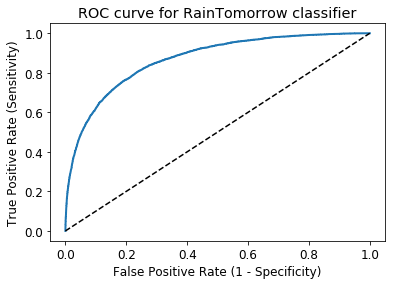

In [130]:
# plot ROC Curve
from sklearn.metrics import roc_curve

# y_test와 y_pred1을 계산한 후에 ROC 곡선을 그립니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



ROC 곡선은 특정 문맥에서 민감도와 특이도를 균형있게 조절하는 임계값을 선택하는 데 도움을 줍니다.

## ROC-AUC
 ROC-AUC는 Receiver Operating Characteristic - Area Under Curve의 약어로, 분류기의 성능을 비교하는 기술입니다. 이 기술에서는 곡선 아래 면적(AUC)을 측정합니다. 완벽한 분류기는 ROC AUC가 1이 되고, 완전한 랜덤 분류기는 ROC AUC가 0.5가 됩니다.

따라서 ROC AUC는 ROC 곡선 아래의 면적의 백분율입니다.

In [131]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8671


### Comments

ROC AUC는 분류기 성능의 단일 숫자 요약입니다. 값이 높을수록 분류기가 더 좋습니다.

우리 모델의 ROC AUC 값은 1에 가까워지므로, 우리 분류기가 내일 비가 올지 여부를 예측하는 데 잘 동작한다고 결론을 내릴 수 있습니다.

In [132]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8675


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>


[Table of Contents](#0.1)

In [133]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84803437 0.8493598  0.8493963  0.84501353 0.84879474]


교차 검증 정확도를 요약하려면, 해당 정확도의 평균을 계산할 수 있습니다

In [134]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8481


우리의 원래 모델 점수는 0.8484으로 나타났습니다. 평균 교차 검증 점수는 0.8481입니다. 따라서 교차 검증은 성능 향상을 가져오지 않음을 결론지을 수 있습니다.

# **20. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>


[Table of Contents](#0.1)

In [135]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [136]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8483


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [137]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8488


### Comments


- 우리 원래 모델의 테스트 정확도는 0.8484이고, GridSearch CV 정확도는 0.8507입니다.

- 우리는 이 특정 모델에서 GridSearch CV가 성능을 향상시켰다는 것을 알 수 있습니다.

# **21. 결과와 결론** <a class="anchor" id="21"></a>


[Table of Contents](#0.1)

1. 로지스틱 회귀 모델의 정확도 점수는 0.8501입니다. 따라서, 이 모델은 내일 오스트레일리아에서 비가 올지 여부를 예측하는 데 매우 잘 작동합니다.

2. 일부 관측치는 내일 비가 올 것으로 예측하고 있으며, 대부분의 관측치는 내일 비가 오지 않을 것으로 예측하고 있습니다.

3. 모델은 과적합의 징후가 없습니다.

4. C 값을 증가시키면 테스트 세트 정확도와 약간 증가한 훈련 세트 정확도가 높아집니다. 따라서 더 복잡한 모델이 더 나은 성능을 발휘할 것으로 결론 짓을 수 있습니다.

5. 임계값을 높이면 정확도가 증가합니다.

6. 모델의 ROC AUC는 1에 가까워집니다. 따라서, 분류기가 내일 비가 올지 여부를 예측하는 데 매우 잘 작동한다는 결론을 내릴 수 있습니다.

7. 원래 모델의 정확도 점수는 0.8501이고, RFECV 이후의 정확도 점수는 0.8500입니다. 따라서, 변수의 수를 줄이면서 거의 유사한 정확도를 얻을 수 있습니다.

8. 원래 모델에서 FP는 1175이고, FP1은 1174입니다. 따라서 거의 동일한 수의 거짓 양성을 얻을 수 있습니다. 또한, FN은 3087이고, FN1은 3091입니다. 따라서, 약간 더 높은 거짓 음성을 얻을 수 있습니다.
 
9. 우리 원래 모델의 점수는 0.8476입니다. 평균 교차 검증 점수는 0.8474입니다. 따라서, 교차 검증은 성능 향상을 가져오지 않는 것으로 결론 짓을 수 있습니다.

10. 우리 원래 모델의 테스트 정확도는 0.8501이고, GridSearch CV 정확도는 0.8507입니다. 이 특정 모델에서 GridSearch CV가 성능을 개선시켰다는 것을 알 수 있습니다.


# **22. 참조** <a class="anchor" id="22"></a>


[Table of Contents](#0.1)



The work done in this project is inspired from following books and websites:-


1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

4. Udemy course – Feature Engineering for Machine Learning by Soledad Galli

5. Udemy course – Feature Selection for Machine Learning by Soledad Galli

6. https://en.wikipedia.org/wiki/Logistic_regression

7. https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

8. https://en.wikipedia.org/wiki/Sigmoid_function

9. https://www.statisticssolutions.com/assumptions-of-logistic-regression/

10. https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

11. https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression

12. https://www.ritchieng.com/machine-learning-evaluate-classification-model/


So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)